In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
import pickle
import torch.optim as optim
import matplotlib.pyplot as plt

#Loading the training data
with open('train.pkl', 'rb') as file:
    train_data = pickle.load(file)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")


In [2]:
class MNISTDataset(Dataset):
    def __init__(self, data,):
        self.data = data

    def __len__(self):
            return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [3]:
train_dataset = MNISTDataset(train_data)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Use random_split to divide the dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])


In [4]:
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=64,shuffle=False)

In [5]:
for images, labels in train_dataloader:
    # Access a single image and label from the batch
    single_image = images[0]  # Get the first image in the batch
    single_label = labels[0]  # Get the first label in the batch
    break  # Stop after getting one batch


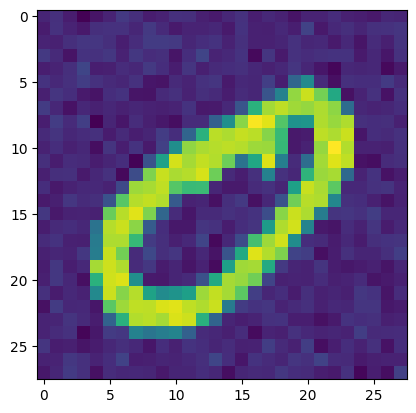

In [6]:
plt.imshow(single_image.squeeze())

In [7]:
class MLP(nn.Module):
    def __init__(self,input_size=28*28,hidden_units=64,output_size=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size,hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,output_size),
        )
    
    def forward(self,x):
        x = x.view(x.size(0), -1)  
        return self.model(x)

In [8]:
input_size=28*28
hidden_units=64
output_size=10
model = MLP().to(device)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
loss_function = nn.CrossEntropyLoss()

In [10]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    val_loss = 0.0
    total_val = 0
    correct_val =0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = loss_function(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    with torch.no_grad():
        for batch_data, batch_labels in val_dataloader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
            outputs = model(batch_data)
            loss  = loss_function(outputs,batch_labels)
            val_loss+=loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += batch_labels.size(0)
            correct_val += (predicted == batch_labels).sum().item()

    
    train_loss = running_loss / len(train_dataloader)
    val_loss = val_loss / len(val_dataloader)
    train_accuracy = 100 * correct / total
    val_accuracy = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}% \n")

Epoch [1/50], Loss: 0.3420, Accuracy: 90.03%
Validation Loss: 0.2343, Validation Accuracy: 92.85% 

Epoch [2/50], Loss: 0.1561, Accuracy: 95.19%
Validation Loss: 0.1709, Validation Accuracy: 95.08% 

Epoch [3/50], Loss: 0.1105, Accuracy: 96.57%
Validation Loss: 0.1409, Validation Accuracy: 95.76% 

Epoch [4/50], Loss: 0.0829, Accuracy: 97.39%
Validation Loss: 0.1186, Validation Accuracy: 96.60% 

Epoch [5/50], Loss: 0.0650, Accuracy: 97.92%
Validation Loss: 0.1175, Validation Accuracy: 96.67% 

Epoch [6/50], Loss: 0.0534, Accuracy: 98.31%
Validation Loss: 0.1099, Validation Accuracy: 96.95% 

Epoch [7/50], Loss: 0.0422, Accuracy: 98.66%
Validation Loss: 0.1123, Validation Accuracy: 96.90% 

Epoch [8/50], Loss: 0.0371, Accuracy: 98.76%
Validation Loss: 0.1209, Validation Accuracy: 96.95% 

Epoch [9/50], Loss: 0.0304, Accuracy: 99.00%
Validation Loss: 0.1168, Validation Accuracy: 96.75% 

Epoch [10/50], Loss: 0.0268, Accuracy: 99.13%
Validation Loss: 0.1268, Validation Accuracy: 96.94% 


KeyboardInterrupt: 